Nama: Farhan Fadhilah 

E-mail: farhanfadhilah5@gmail.com

Kota: Kabupaten Bogor (Cibinong)

Disarankan menggunakan runtime GPU untuk meminimalisir waktu pada saat epoch

Dengan cara : 

*   Runtime
*   Change Runtime Type
*   Hardware acceleratornya GPU
*   Save





In [1]:
#versi tensorflow dan import tensorflow
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
#download dataset rockpaperscissors di web dicoding
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-11-02 05:50:15--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.20MB/s    in 55s     

2020-11-02 05:51:11 (5.58 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
#ekstrak file rockpaperscissors.zip
import os
import zipfile

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/rps')
zip_ref.close()

In [4]:
#callback epoch kalo dah 97%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print("\nAkurasi sudah memenuhi kondisi ketentuan")
      self.model.stop_training = True

callbacks = myCallback()

In [5]:
#menentukan direktori
base_dir = '/rps/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [6]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [7]:
#membuat direktori rock pada direktori data training
train_rock = os.path.join(train_dir, 'rock')

#membuat direktori paper pada direktori data training
train_paper = os.path.join(train_dir, 'paper')

#membuat direktori scissors pada direktori data training
train_scissors = os.path.join(train_dir, 'scissors')

#---------------------------------------------------------------------

#membuat direktori rock pada direktori data validasi
val_rock = os.path.join(validation_dir, 'rock')

#membuat direktori paper pada direktori data validasi
val_paper = os.path.join(validation_dir, 'paper')

#membuat direktori scissors pada direktori data validasi
val_scissors = os.path.join(validation_dir, 'scissors')

In [8]:
os.mkdir(train_rock)
os.mkdir(train_paper)
os.mkdir(train_scissors)
os.mkdir(val_rock)
os.mkdir(val_paper)
os.mkdir(val_scissors)

In [9]:
#split data dan data validasi 0.40
from sklearn.model_selection import train_test_split

train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.40)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.40)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.40)

In [10]:
import shutil

for file in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(train_rock, file))
for file in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(train_paper,file))
for file in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(train_scissors,file))
for file in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(val_rock,file))
for file in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(val_paper,file))
for file in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(val_scissors,file))

In [11]:
#image data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='categorical' #categorical soalnya kelasnya lebih dari 2 kalo kurang dari 2 bisa pakai 'binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [13]:
#arsitektur CNN
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [14]:
#menampilkan hasil / summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [15]:
#optimizer Adam dan categorical crossentrpy
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
#pelatihan model dengan model.fit sebanyak 25 kali batch
hist = model.fit(
    train_generator,
    steps_per_epoch = 41,
    epochs = 25,
    validation_data = validation_generator,
    validation_steps = 27,
    verbose =2,
      callbacks=[callbacks]
)

Epoch 1/25
41/41 - 15s - loss: 1.0616 - accuracy: 0.5137 - val_loss: 0.6591 - val_accuracy: 0.7546
Epoch 2/25
41/41 - 15s - loss: 0.6186 - accuracy: 0.7729 - val_loss: 0.3749 - val_accuracy: 0.8785
Epoch 3/25
41/41 - 15s - loss: 0.3439 - accuracy: 0.8811 - val_loss: 0.3398 - val_accuracy: 0.8738
Epoch 4/25
41/41 - 15s - loss: 0.2675 - accuracy: 0.9040 - val_loss: 0.2233 - val_accuracy: 0.9329
Epoch 5/25
41/41 - 15s - loss: 0.2464 - accuracy: 0.9146 - val_loss: 0.2058 - val_accuracy: 0.9155
Epoch 6/25
41/41 - 15s - loss: 0.2232 - accuracy: 0.9146 - val_loss: 0.2929 - val_accuracy: 0.8993
Epoch 7/25
41/41 - 15s - loss: 0.1888 - accuracy: 0.9398 - val_loss: 0.1626 - val_accuracy: 0.9525
Epoch 8/25
41/41 - 15s - loss: 0.1940 - accuracy: 0.9306 - val_loss: 0.1589 - val_accuracy: 0.9363
Epoch 9/25
41/41 - 15s - loss: 0.1833 - accuracy: 0.9390 - val_loss: 0.1642 - val_accuracy: 0.9433
Epoch 10/25
41/41 - 15s - loss: 0.1532 - accuracy: 0.9489 - val_loss: 0.1589 - val_accuracy: 0.9560
Epoch 11/

In [17]:
#UNTUK MENAMPILKAN AKURASI DARI EPOCH TADI
score = model.evaluate(train_generator)
print("Akurasi: ", score[1]*100, "%")

41/41 [==============================] - 9s 213ms/step - loss: 0.0486 - accuracy: 0.9832
Akurasi:  98.32317233085632 %


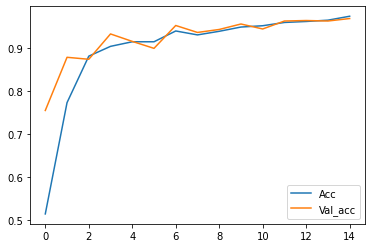

In [18]:
from matplotlib import pyplot as plt
#menampilkan graph akurasi
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Acc', 'Val_acc'])
plt.show()

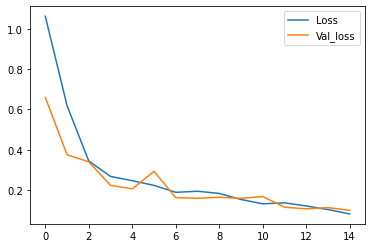

In [19]:
#menampilkan graph error
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Loss', 'Val_loss'])
plt.show()

Saving 0ePX1wuCc3et7leL.png to 0ePX1wuCc3et7leL.png
Saving 0eqArS2GgsBeqgSn.png to 0eqArS2GgsBeqgSn.png
Saving 0zKU6wEhT2cDe9j0.png to 0zKU6wEhT2cDe9j0.png
Saving 01dM3ewPIsnBICu1.png to 01dM3ewPIsnBICu1.png
Saving 1BqjHe5igJAgUjiN.png to 1BqjHe5igJAgUjiN.png
Saving 1DxbXT3M2qiMjCmC.png to 1DxbXT3M2qiMjCmC.png
Saving 1MMkSW3f1CAsw03q.png to 1MMkSW3f1CAsw03q.png
Saving 1Tt9U9SzrOm98Xtw.png to 1Tt9U9SzrOm98Xtw.png
Saving 17HZDUFSVPxcar99.png to 17HZDUFSVPxcar99.png
Saving WIN_20201101_20_58_47_Pro.jpg to WIN_20201101_20_58_47_Pro.jpg
Saving WIN_20201101_20_58_53_Pro.jpg to WIN_20201101_20_58_53_Pro.jpg
Saving WIN_20201101_20_58_57_Pro.jpg to WIN_20201101_20_58_57_Pro.jpg


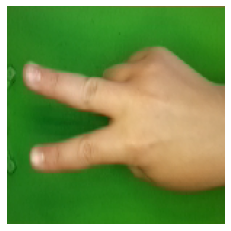

0ePX1wuCc3et7leL.png
SCISSORS / GUNTING


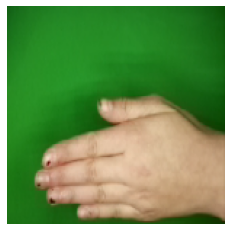

0eqArS2GgsBeqgSn.png
PAPER / KERTAS


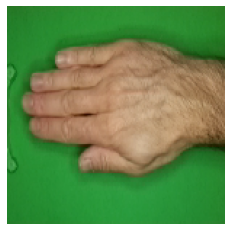

0zKU6wEhT2cDe9j0.png
PAPER / KERTAS


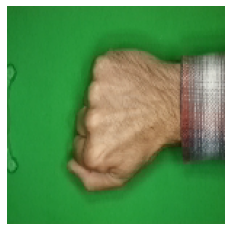

01dM3ewPIsnBICu1.png
ROCK / BATU


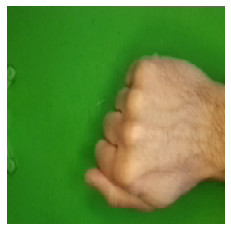

1BqjHe5igJAgUjiN.png
ROCK / BATU


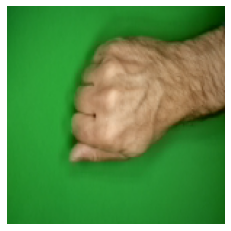

1DxbXT3M2qiMjCmC.png
ROCK / BATU


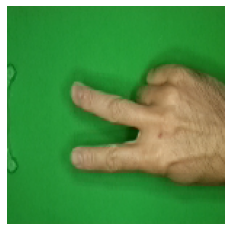

1MMkSW3f1CAsw03q.png
SCISSORS / GUNTING


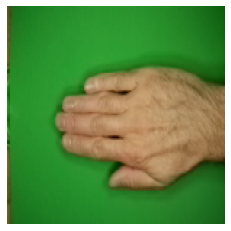

1Tt9U9SzrOm98Xtw.png
PAPER / KERTAS


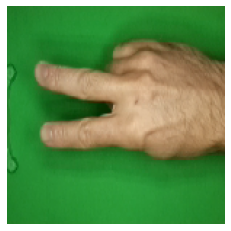

17HZDUFSVPxcar99.png
SCISSORS / GUNTING


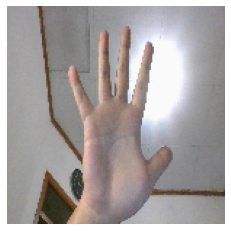

WIN_20201101_20_58_47_Pro.jpg
PAPER / KERTAS


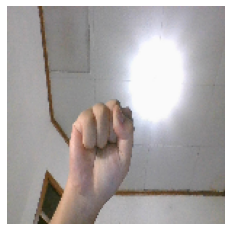

WIN_20201101_20_58_53_Pro.jpg
PAPER / KERTAS


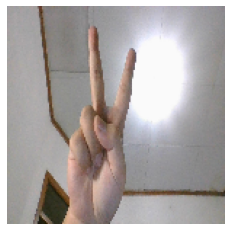

WIN_20201101_20_58_57_Pro.jpg
PAPER / KERTAS


In [20]:
#untuk menambahkan upload berkas gambar
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  plt.axis('off') 
  plt.show()
  
  print(fn)
  if classes[0][0]==1:
    print('PAPER / KERTAS')
  elif classes[0][1]==1:
    print('ROCK / BATU')
  elif classes[0][2]==1:
    print('SCISSORS / GUNTING')